In [121]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import datetime as dt
import requests
import hvplot.pandas

# Import API key
from Geo_key import geoapify_key

In [122]:
# Create a path to the csv file
complaints_path = "Cleaned_Data_Consumer_Complaints.csv"

# Read the customer complaints data and display columns
complaints_metadata = pd.read_csv(complaints_path)
complaints_metadata.head()

,Complaint ID,Date received,Product,Sub-product,Issue,Company public response,Company,State,ZIP code,Consumer consent provided?,Submitted via,Date sent to company,Timely response?,Consumer disputed?,Company response to consumer
0,3481392,12/31/2019,Mortgage,VA mortgage,Struggling to pay mortgage,No,"PENNYMAC LOAN SERVICES, LLC.",TX,78250,Consent provided,Web,12/31/2019,Yes,Unknown,Closed with non-monetary relief
1,3479162,12/28/2019,Mortgage,VA mortgage,Trouble during payment process,No,JPMORGAN CHASE & CO.,TX,75023,Consent provided,Web,12/28/2019,Yes,Unknown,Closed with explanation
2,3478150,12/27/2019,Mortgage,FHA mortgage,Trouble during payment process,No,Mr. Cooper Group Inc.,TX,78754,Consent provided,Web,12/27/2019,Yes,Unknown,Closed with explanation
3,3478892,12/27/2019,Mortgage,Conventional home mortgage,Trouble during payment process,Yes,Specialized Loan Servicing Holdings LLC,TX,76001,Consent provided,Web,12/27/2019,Yes,Unknown,Closed with explanation
4,3478257,12/26/2019,Mortgage,FHA mortgage,Trouble during payment process,Yes,"Flagstar Bank, N.A.",TX,75068,Consent provided,Web,12/26/2019,Yes,Unknown,Closed with explanation


In [106]:
# JODEE START 
#Count of how many of each type of closed response with which issues were addressed with a public or non-public response.
response_df = complaints_metadata.groupby(["Company response to consumer",("Company public response")])["Issue"].count()
display(response_df)

Company response to consumer     Company public response
Closed                           No                           80
                                 Yes                           7
Closed with explanation          No                         3839
                                 Yes                        2208
Closed with monetary relief      No                          168
                                 Yes                         126
Closed with non-monetary relief  No                          182
                                 Yes                         165
Closed with relief               No                           18
Closed without relief            No                          158
Untimely response                No                           15
Name: Issue, dtype: int64

In [19]:
#Dataframe with only Yes Public Responses 
Yes_response_df = complaints_metadata.loc[complaints_metadata['Company public response']!="No", :]

In [20]:
#Dataframe with only No Public Responses 
No_response_df = complaints_metadata.loc[complaints_metadata['Company public response']!="Yes", :]

In [107]:
# Dataframe counting the issues by company response to consumer that gave a Public Response
response_Y_df = Yes_response_df.groupby(["Company response to consumer"])["Issue"].count()
display(response_Y_df)

Company response to consumer
Closed                                7
Closed with explanation            2208
Closed with monetary relief         126
Closed with non-monetary relief     165
Name: Issue, dtype: int64

In [108]:
# Dataframe counting the issues by company response to consumer and type of issue that gave a Public Response
Detailed_response_Y_df = Yes_response_df.groupby(["Company response to consumer", "Issue"])["Issue"].count()
display(Detailed_response_Y_df)

Company response to consumer     Issue                                                                           
Closed                           Application, originator, mortgage broker                                              3
                                 Loan modification,collection,foreclosure                                              1
                                 Settlement process and costs                                                          3
Closed with explanation          Application, originator, mortgage broker                                             92
                                 Applying for a mortgage or refinancing an existing mortgage                         109
                                 Closing on a mortgage                                                                86
                                 Credit decision / Underwriting                                                       32
                                 Improp

In [109]:
# What company with which Company responses to consumers that ARE Public and the issues they had and the count of those issues. 
company_response_Y_df = Yes_response_df.groupby(["Company","Company response to consumer"])["Issue"].value_counts()
display(company_response_Y_df)

Company                       Company response to consumer  Issue                                                      
1ST PREFERENCE MORTGAGE CORP  Closed with explanation       Settlement process and costs                                   1
360 MORTGAGE GROUP LLC        Closed with explanation       Loan modification,collection,foreclosure                       1
                                                            Loan servicing, payments, escrow account                       1
ALLY FINANCIAL INC.           Closed with explanation       Application, originator, mortgage broker                       1
AMA Advisors, LLC.            Closed with explanation       Loan servicing, payments, escrow account                       5
                                                                                                                          ..
WSFS FINANCIAL CORPORATION    Closed with explanation       Applying for a mortgage or refinancing an existing mortgage    1
ZIONS

In [110]:
# Dataframe counting the issues by company response to consumer that did NOT give a Public Response
response_N_df = No_response_df.groupby(["Company response to consumer"])["Issue"].count()
display(response_N_df)

Company response to consumer
Closed                               80
Closed with explanation            3839
Closed with monetary relief         168
Closed with non-monetary relief     182
Closed with relief                   18
Closed without relief               158
Untimely response                    15
Name: Issue, dtype: int64

In [119]:
# Dataframe counting the issues by company response to consumer and type of issue that did NOT give a Public Response
Detailed_response_N_df = No_response_df.groupby(["Company response to consumer","Issue"])["Issue"].count()
display(response_N_df)

Company response to consumer
Closed                               80
Closed with explanation            3839
Closed with monetary relief         168
Closed with non-monetary relief     182
Closed with relief                   18
Closed without relief               158
Untimely response                    15
Name: Issue, dtype: int64

In [112]:
# What company with which Company responses to consumers that were NOT public and the issues they had and the count of those issues. 
company_response_N_df = No_response_df.groupby([ "Company","Company response to consumer"])["Issue"].value_counts()
display(company_response_N_df)

Company                      Company response to consumer  Issue                                                      
1ST ALLIANCE LENDING, LLC    Closed with explanation       Applying for a mortgage or refinancing an existing mortgage    1
21ST MORTGAGE CORP.          Closed with explanation       Loan modification,collection,foreclosure                       3
                                                           Loan servicing, payments, escrow account                       3
                                                           Struggling to pay mortgage                                     3
                                                           Application, originator, mortgage broker                       1
                                                                                                                         ..
WILLOW BEND MORTGAGE         Closed with explanation       Closing on a mortgage                                          1
             

In [113]:
# Merging Dataframes of responses counted to plot on a bar graph
merge_df = pd.merge( response_Y_df,response_N_df, how= 'outer', on="Company response to consumer")
display(merge_df)

,Issue_x,Issue_y
Company response to consumer,,
Closed,7.0,80
Closed with explanation,2208.0,3839
Closed with monetary relief,126.0,168
Closed with non-monetary relief,165.0,182
Closed with relief,NaN,18
Closed without relief,NaN,158
Untimely response,NaN,15


In [114]:
#  Renaming columns to be displayed on the legend
Bar_df = merge_df.rename(columns={"Issue_x":"Public Response" , "Issue_y": "No Public Response"})
display(Bar_df)

,Public Response,No Public Response
Company response to consumer,,
Closed,7.0,80
Closed with explanation,2208.0,3839
Closed with monetary relief,126.0,168
Closed with non-monetary relief,165.0,182
Closed with relief,NaN,18
Closed without relief,NaN,158
Untimely response,NaN,15


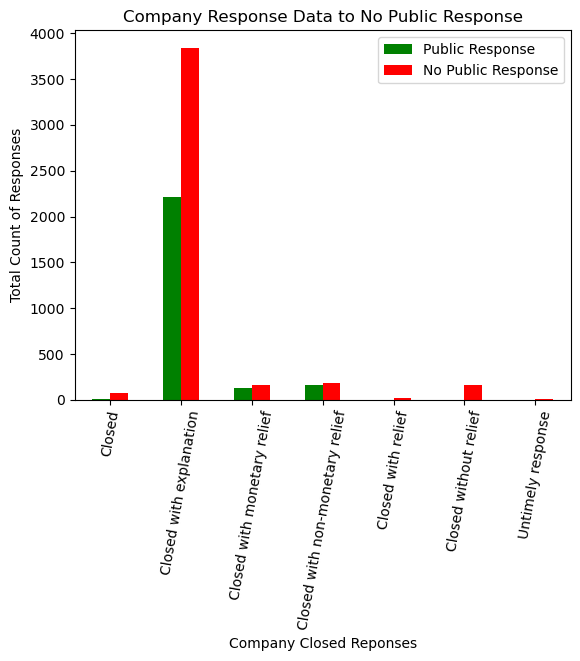

<Figure size 640x480 with 0 Axes>

In [116]:
# JODEE END
#How to add a total count to each Bar
Bar_df.plot(kind="bar", color=["g","r"])
plt.xticks(rotation=80)
plt.title("Company Response Data to No Public Response")
plt.xlabel("Company Closed Reponses")
plt.ylabel("Total Count of Responses")
plt.show()
plt.tight_layout()
plt.savefig('Company_Reponse_Data.png')

In [147]:
unique_zipcodes = complaints_metadata["ZIP code"].unique()
unique_zipcodes

array([78250, 75023, 78754, 76001, 75068, 75418, 77095, 77904, 78229,
       78109, 76248, 75039, 77901, 76054, 75189, 75001, 76449, 75227,
       75080, 75025, 77429, 75071, 78245, 77583, 76164, 76002, 77385,
       76028, 77551, 77494, 78610, 77401, 77469, 75154, 75208, 75041,
       75094, 77040, 77355, 77019, 79763, 75007, 77080, 77084, 76034,
       79912, 75078, 78702, 76036, 75230, 77584, 75104, 77039, 79424,
       75024, 75165, 75115, 77043, 78239, 77489, 77382, 76549, 76227,
       77389, 78223, 77450, 76065, 77070, 76426, 75206, 75287, 75019,
       75035, 77047, 78947, 75082, 78664, 77375, 75070, 76133, 77008,
       77009, 75167, 75032, 75098, 76087, 77545, 75126, 78041, 76012,
       78063, 75225, 75077, 78759, 76179, 78132, 78633, 75252, 75087,
       76018, 76504, 78704, 77379, 78681, 77511, 78163, 76039, 75052,
       76058, 78586, 78108, 76134, 77479, 77074, 75067, 77005, 75237,
       78634, 76016, 75062, 76543, 75160, 76013, 78045, 76040, 78758,
       76140, 78052,

In [133]:
 #Access the API Url to get a response
url = 'https://api.geoapify.com/v1/geocode/search?'
zipcode_temp = postal_codes[0]

zip_url = f"{url}apiKey={geoapify_key}&postcode={zipcode}"
response = requests.get(zip_url)
# zip_data.append(response.json())
response.json()

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'result_type': 'postcode',
    'city': 'Little Elm',
    'county': 'Denton County',
    'state': 'Texas',
    'postcode': '75068',
    'country': 'United States',
    'country_code': 'us',
    'datasource': {'sourcename': 'openstreetmap',
     'attribution': '© OpenStreetMap contributors',
     'license': 'Open Database License',
     'url': 'https://www.openstreetmap.org/copyright'},
    'state_code': 'TX',
    'lon': -96.90734799,
    'lat': 33.199304095,
    'formatted': 'Little Elm, TX 75068, United States of America',
    'address_line1': 'Little Elm, TX 75068',
    'address_line2': 'United States of America',
    'category': 'administrative',
    'timezone': {'name': 'America/Chicago',
     'offset_STD': '-06:00',
     'offset_STD_seconds': -21600,
     'offset_DST': '-05:00',
     'offset_DST_seconds': -18000,
     'abbreviation_STD': 'CST',
     'abbreviation_DST': 'CDT'},
    'plus_code': '865553

In [ ]:
zip_to_lat_lng = {}
zip_lat_lng_df = []

complaints_metadata['latitude'] = 0.0
complaints_metadata['longitude'] = 0.0

for zipcode in unique_zipcodes:
    zip_url = f"{url}apiKey={geoapify_key}&postcode={zipcode}"
    response = requests.get(zip_url)
    
    try:
        resp=response.json()["features"][0]
        lat = resp['properties']['lat']
        long = resp['properties']['lon']
        
        coord = {"lat":lat, "long":long}
        zip_to_lat_lng[zipcode] = coord
        print(f'add in zipcode{zipcode}')
    
    except:
        pass

zip_to_lat_lng

add in zipcode78250
add in zipcode75023
add in zipcode78754
add in zipcode76001
add in zipcode75068
add in zipcode75418
add in zipcode77095
add in zipcode77904
add in zipcode78229
add in zipcode78109
add in zipcode76248
add in zipcode75039
add in zipcode77901
add in zipcode76054
add in zipcode75189
add in zipcode75001
add in zipcode76449
add in zipcode75227
add in zipcode75080
add in zipcode75025
add in zipcode77429
add in zipcode75071
add in zipcode78245
add in zipcode77583
add in zipcode76164
add in zipcode76002
add in zipcode77385
add in zipcode76028
add in zipcode77551
add in zipcode77494
add in zipcode78610
add in zipcode77401
add in zipcode77469
add in zipcode75154
add in zipcode75208
add in zipcode75041
add in zipcode75094
add in zipcode77040
add in zipcode77355
add in zipcode77019
add in zipcode79763
add in zipcode75007
add in zipcode77080
add in zipcode77084
add in zipcode76034
add in zipcode79912
add in zipcode75078
add in zipcode78702
add in zipcode76036
add in zipcode75230


add in zipcode78201
add in zipcode75454
add in zipcode77090
add in zipcode79108
add in zipcode77060
add in zipcode77441
add in zipcode78750
add in zipcode77002
add in zipcode77014
add in zipcode75060
add in zipcode76123
add in zipcode75428
add in zipcode78240
add in zipcode77015
add in zipcode77471
add in zipcode78363
add in zipcode78748
add in zipcode76135
add in zipcode76432
add in zipcode76541
add in zipcode78621
add in zipcode75034
add in zipcode75088
add in zipcode78415
add in zipcode75938
add in zipcode78606
add in zipcode76060
add in zipcode77004
add in zipcode76247
add in zipcode79705
add in zipcode77020
add in zipcode77478
add in zipcode77562
add in zipcode75028
add in zipcode77035
add in zipcode79110
add in zipcode76107
add in zipcode77079
add in zipcode78669
add in zipcode78705
add in zipcode78541
add in zipcode77071
add in zipcode77354
add in zipcode76084
add in zipcode75672
add in zipcode76067
add in zipcode77021
add in zipcode76148
add in zipcode75173
add in zipcode78577


In [157]:
complaints_metadata["latitude"] = complaints_metadata["ZIP code"].map(lambda zip: zip_to_lat_lng[zip]["lat"])
complaints_metadata["longitude"] = complaints_metadata["ZIP code"].map(lambda zip: zip_to_lat_lng[zip]["lon"])
complaints_metadata

KeyError: 78553

In [ ]:
map_plot_1 = complaints_metadata.hvplot.points(
    'longitude',
    'latitude',
    geo = True,
    tiles = "OSM",
    color = "Company public response"
)

# Display the map
map_plot_1

In [134]:
zip_url

'https://api.geoapify.com/v1/geocode/search?apiKey=089b3452144f4c20bd3e21802411cbde&postcode=75068'

In [12]:
#Verifying there is no duplicate Customer ID's
checking = complaints_metadata["Complaint ID"].duplicated()
checking.nunique()

1

In [13]:
#checking how many unique company responses to consumers were present in the dataset
issues_df = complaints_metadata["Company response to consumer"].unique()
list(issues_df)

['Closed with non-monetary relief',
 'Closed with explanation',
 'Closed with monetary relief',
 'Untimely response',
 'Closed',
 'Closed without relief',
 'Closed with relief']

In [15]:
#EZE START
# Grouped and created a Data Frame for all mortgages and issues reported
product_df = complaints_metadata.groupby('Product')['Issue']
mort_df = product_df.get_group('Mortgage').value_counts()
mort_df = pd.DataFrame(mort_df)
mort_df = mort_df.rename(columns={"Issue": "Total # of Issues"})
mortf_df = pd.DataFrame(mort_df)
mortf_df

,Total # of Issues
"Loan servicing, payments, escrow account",1934
"Loan modification,collection,foreclosure",1479
Trouble during payment process,1320
Struggling to pay mortgage,859
"Application, originator, mortgage broker",434
Applying for a mortgage or refinancing an existing mortgage,239
Settlement process and costs,232
Closing on a mortgage,208
Credit decision / Underwriting,161
Incorrect information on your report,76


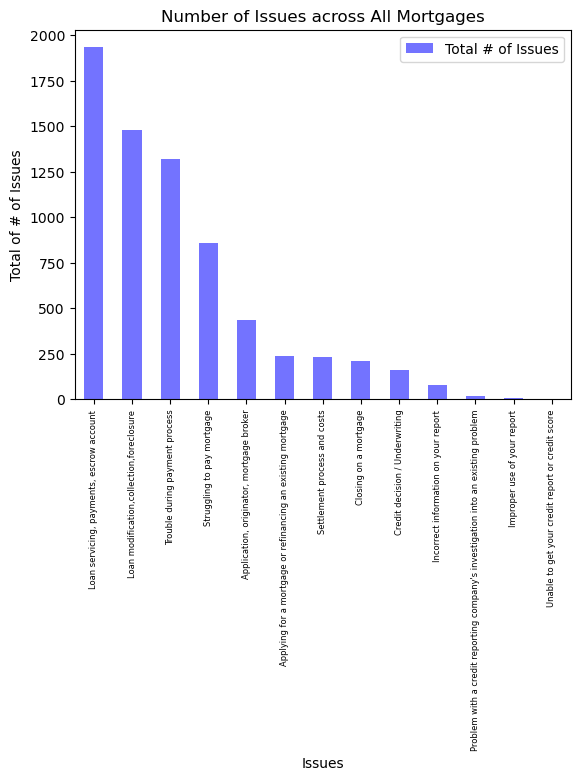

In [89]:
#Number of Issues across all mortages 
mortf_df.plot.bar(color='b', alpha=0.55, align='center')
plt.title('Number of Issues across All Mortgages')
plt.xticks(rotation='vertical', fontsize=6)
plt.xlabel('Issues')
plt.ylabel('Total of # of Issues')
plt.savefig('All Mortgages_Issues')
plt.show()

In [16]:
# Grouped and created a Data Frame for individual mortgages and total number of corresponding issues
imortg_grouped_issue = complaints_metadata.groupby('Sub-product')['Issue'].value_counts()
imortg_grouped_df = pd.DataFrame(imortg_grouped_issue)
imortg_grouped_df = imortg_grouped_df.rename(columns={"Issue": "# of Issues"})
imortg_grouped_df

# of Issues
Sub-product                            Issue                                                          
Conventional adjustable mortgage (ARM) Loan modification,collection,foreclosure                    257
                                       Loan servicing, payments, escrow account                    198
                                       Application, originator, mortgage broker                     33
                                       Credit decision / Underwriting                               18
                                       Settlement process and costs                                 18
Conventional fixed mortgage            Loan servicing, payments, escrow account                   1154
                                       Loan modification,collection,foreclosure                    685
                                       Application, originator, mortgage broker                    250
                                       Settlement process and costs                                128
                                       Credit decision / Underwriting                               89
Conventional home mortgage             Trouble during payment process                              793
                                       Struggling to pay mortgage                                  441
                                       Applying for a mortgage or refinancing an exist...          145
                                       Closing on a mortgage                                       114
                                       Incorrect information on your report                         38
                                       Problem with a credit reporting company's inves...            9
                                       Improper use of your report                                   4
                                       Unable to get your credit report or credit score              3
FHA mortgage                           Loan servicing, payments, escrow account                    438
                                       Loan modification,collection,foreclosure                    434
                                       Trouble during payment process                              247
                                       Struggling to pay mortgage                                  233
                                       Application, originator, mortgage broker                    103
                                       Settlement process and costs                                 65
                                       Applying for a mortgage or refinancing an exist...           57
                                       Closing on a mortgage                                        51
                                       Credit decision / Underwriting                               42
                                       Incorrect information on your report                         16
                                       Problem with a credit reporting company's inves...            3
Other type of mortgage                 Trouble during payment process                              146
                                       Struggling to pay mortgage                                  117
                                       Closing on a mortgage                                        28
                                       Applying for a mortgage or refinancing an exist...           18
                                       Incorrect information on your report                         11
                                       Improper use of your report                                   2
VA mortgage                            Loan servicing, payments, escrow account                    144
                                       Trouble during payment process                              134
                                       Loan modification,collection,forecl

In [17]:
# Grouped and created a Data Frame for all mortgages and total number of corresponding public responses
cprproduct_df = complaints_metadata.groupby('Product')['Company public response']
cpr_df = cprproduct_df.get_group('Mortgage').value_counts()
cpr_df = pd.DataFrame(cpr_df)
cpr_df = cpr_df.rename(columns={"Company public response": "# of Public Responses"})
cprf_df = pd.DataFrame(cpr_df)
cprf_df

,# of Public Responses
No,4460
Yes,2506


In [18]:
# Grouped and created a Data Frame for individual mortgages and total number of corresponding public responses
imortg_grouped_response = complaints_metadata.groupby('Sub-product')['Company public response'].value_counts()
imortg_grouped_res_df = pd.DataFrame(imortg_grouped_response)
imortg_grouped_res_df = imortg_grouped_res_df.rename(columns={"Company public response": "# of Public Responses"})
imortg_grouped_res_df

# of Public Responses
Sub-product                            Company public response                       
Conventional adjustable mortgage (ARM) No                                         420
                                       Yes                                        104
Conventional fixed mortgage            No                                        1793
                                       Yes                                        513
Conventional home mortgage             Yes                                        809
                                       No                                         738
FHA mortgage                           No                                        1051
                                       Yes                                        638
Other type of mortgage                 Yes                                        165
                                       No                                         157
VA mortgage                            No                                         301
                                       Yes                                        277

In [21]:
# Count of how many of each type of closed response with which Mortgage were addressed with a public or non-public response.
response_df = complaints_metadata.groupby(["Company response to consumer",("Company public response")])["Sub-product"].count()
response_df

Company response to consumer     Company public response
Closed                           No                           80
                                 Yes                           7
Closed with explanation          No                         3839
                                 Yes                        2208
Closed with monetary relief      No                          168
                                 Yes                         126
Closed with non-monetary relief  No                          182
                                 Yes                         165
Closed with relief               No                           18
Closed without relief            No                          158
Untimely response                No                           15
Name: Sub-product, dtype: int64

In [22]:
# Created a Dataframe counting the issues by Mortgage response to consumer that gave a Public Response
response_Y_df = Yes_response_df.groupby(["Sub-product"])["Issue"].count()
response_Y_df

Sub-product
Conventional adjustable mortgage (ARM)    104
Conventional fixed mortgage               513
Conventional home mortgage                809
FHA mortgage                              638
Other type of mortgage                    165
VA mortgage                               277
Name: Issue, dtype: int64

In [23]:
# Created a Dataframe counting the issues by Mortgage response to consumer and type of issue that gave a Public Response
Detailed_response_Y_df = Yes_response_df.groupby(["Company response to consumer", "Sub-product"])["Sub-product"].count()
Detailed_response_Y_df

Company response to consumer     Sub-product                           
Closed                           Conventional fixed mortgage                 3
                                 FHA mortgage                                3
                                 VA mortgage                                 1
Closed with explanation          Conventional adjustable mortgage (ARM)     87
                                 Conventional fixed mortgage               436
                                 Conventional home mortgage                726
                                 FHA mortgage                              567
                                 Other type of mortgage                    147
                                 VA mortgage                               245
Closed with monetary relief      Conventional adjustable mortgage (ARM)      7
                                 Conventional fixed mortgage                38
                                 Conventional home mortgage

In [24]:
# What mortgage with which Company responses to consumers that ARE Public and the issues they had and the count of those issues. 
company_response_Y_df = Yes_response_df.groupby(["Sub-product","Company response to consumer"])["Issue"].value_counts()
company_response_Y_df

Sub-product                             Company response to consumer     Issue                                   
Conventional adjustable mortgage (ARM)  Closed with explanation          Loan modification,collection,foreclosure    38
                                                                         Loan servicing, payments, escrow account    38
                                                                         Application, originator, mortgage broker     6
                                                                         Credit decision / Underwriting               3
                                                                         Settlement process and costs                 2
                                                                                                                     ..
VA mortgage                             Closed with non-monetary relief  Struggling to pay mortgage                   2
                                              

In [25]:
# Created a Dataframe counting the issues by specific mortgages that did NOT give a Public Response
response_N_df = No_response_df.groupby(["Sub-product"])["Issue"].count()
response_N_df

Sub-product
Conventional adjustable mortgage (ARM)     420
Conventional fixed mortgage               1793
Conventional home mortgage                 738
FHA mortgage                              1051
Other type of mortgage                     157
VA mortgage                                301
Name: Issue, dtype: int64

In [26]:
# Created a Dataframe counting the issues by company response to consumer and type of mortgage that did NOT give a Public Response
Detailed_response_N_df = No_response_df.groupby(["Company response to consumer","Sub-product"])["Sub-product"].count()
Detailed_response_N_df

Company response to consumer     Sub-product                           
Closed                           Conventional adjustable mortgage (ARM)      13
                                 Conventional fixed mortgage                 43
                                 FHA mortgage                                18
                                 VA mortgage                                  6
Closed with explanation          Conventional adjustable mortgage (ARM)     351
                                 Conventional fixed mortgage               1473
                                 Conventional home mortgage                 699
                                 FHA mortgage                               912
                                 Other type of mortgage                     144
                                 VA mortgage                                260
Closed with monetary relief      Conventional adjustable mortgage (ARM)       6
                                 Conventional fi

In [27]:
# What mortgage with which Company responses to consumers that were NOT public and the issues they had and the count of those issues. 
company_response_N_df = No_response_df.groupby(["Sub-product","Company response to consumer"])["Issue"].value_counts()
company_response_N_df

Sub-product                             Company response to consumer     Issue                                   
Conventional adjustable mortgage (ARM)  Closed                           Loan modification,collection,foreclosure      6
                                                                         Loan servicing, payments, escrow account      6
                                                                         Credit decision / Underwriting                1
                                        Closed with explanation          Loan modification,collection,foreclosure    175
                                                                         Loan servicing, payments, escrow account    133
                                                                                                                    ... 
VA mortgage                             Closed with non-monetary relief  Trouble during payment process                1
                                       

In [28]:
# Merging all Dataframes of responses counted to plot on a bar graph
company_merge_df = pd.merge(company_response_N_df, company_response_Y_df, how= 'inner', on="Sub-product")
merge_df = pd.merge(response_N_df, response_Y_df, how= 'outer', on="Sub-product")

#Renaming columns to be displayed on the legend
Bar_df = merge_df.rename(columns={"Issue_x": "No Public Response", "Issue_y": "Public Response"})
Bar_df

,No Public Response,Public Response
Sub-product,,
Conventional adjustable mortgage (ARM),420,104
Conventional fixed mortgage,1793,513
Conventional home mortgage,738,809
FHA mortgage,1051,638
Other type of mortgage,157,165
VA mortgage,301,277


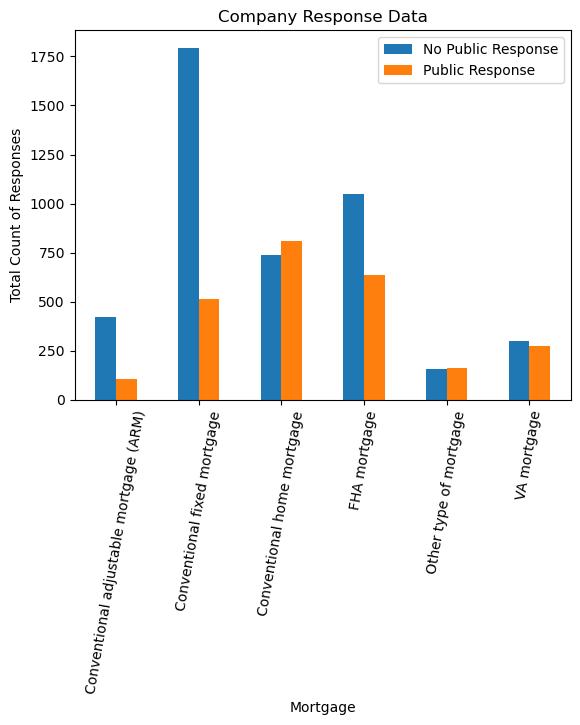

<Figure size 640x480 with 0 Axes>

In [29]:
# Now to add a total count to each Bar
Bar_df.plot(kind="bar")
plt.xticks(rotation=80)
plt.title("Company Response Data")
plt.xlabel("Mortgage")
plt.ylabel("Total Count of Responses")
plt.show()
plt.tight_layout()
plt.savefig('Company_Reponse_Data.png')

In [30]:
# Grouped and created a Data Frame for all public reponse mortgages and company consumer responses reported
crcproduct_df = Yes_response_df.groupby('Product')['Company response to consumer']
issuescrc_df = crcproduct_df.get_group('Mortgage').value_counts()
issuescrc_df = pd.DataFrame(issuescrc_df)
issuescrc_df = issuescrc_df.rename(columns={"Company response to consumer": "Total # of Responses"})
issuescrcf_df = pd.DataFrame(issuescrc_df)
issuescrcf_df

,Total # of Responses
Closed with explanation,2208
Closed with non-monetary relief,165
Closed with monetary relief,126
Closed,7


In [31]:
# Grouped and created a Data Frame for all Nonpublic response mortgages and company consumer responses reported
NON_crcproduct_df = No_response_df.groupby('Product')['Company response to consumer']
NON_issuescrc_df = NON_crcproduct_df.get_group('Mortgage').value_counts()
NON_issuescrc_df = pd.DataFrame(NON_issuescrc_df)
NON_issuescrc_df = NON_issuescrc_df.rename(columns={"Company response to consumer": "Total # of Responses"})
NON_issuescrcf_df = pd.DataFrame(NON_issuescrc_df)
NON_issuescrcf_df

,Total # of Responses
Closed with explanation,3839
Closed with non-monetary relief,182
Closed with monetary relief,168
Closed without relief,158
Closed,80
Closed with relief,18
Untimely response,15


In [32]:
# Grouped and created individual mortgages together to obtain total number of company responses to consumer
imortg_grouped_presponse = Yes_response_df.groupby('Sub-product')['Company response to consumer'].value_counts()
imortg_grouped_presponse_df = pd.DataFrame(imortg_grouped_presponse)
imortg_grouped_presponse_df = imortg_grouped_presponse_df.rename(columns={"Company response to consumer": "Total # of Responses"})
imortg_grouped_presponse_df

Total # of Responses
Sub-product                            Company response to consumer                         
Conventional adjustable mortgage (ARM) Closed with explanation                            87
                                       Closed with non-monetary relief                    10
                                       Closed with monetary relief                         7
Conventional fixed mortgage            Closed with explanation                           436
                                       Closed with monetary relief                        38
                                       Closed with non-monetary relief                    36
                                       Closed                                              3
Conventional home mortgage             Closed with explanation                           726
                                       Closed with non-monetary relief                    47
                                       Closed with monetary relief                        36
FHA mortgage                           Closed with explanation                           567
                                       Closed with non-monetary relief                    49
                                       Closed with monetary relief                        19
                                       Closed                                              3
Other type of mortgage                 Closed with explanation                           147
                                       Closed with monetary relief                         9
                                       Closed with non-monetary relief                     9
VA mortgage                            Closed with explanation                           245
                                       Closed with monetary relief                        17
                                       Closed with non-monetary relief                    14
                                       Closed                                              1

In [33]:
# Grouped Nonpublic response and created individual mortgages together to obtain total number of company responses to consumer
NON_imortg_grouped_presponse = No_response_df.groupby('Sub-product')['Company response to consumer'].value_counts()
NON_imortg_grouped_presponse_df = pd.DataFrame(NON_imortg_grouped_presponse)
NON_imortg_grouped_presponse_df = NON_imortg_grouped_presponse_df.rename(columns={"Company response to consumer": "Total # of Responses"})
NON_imortg_grouped_presponse_df

Total # of Responses
Sub-product                            Company response to consumer                         
Conventional adjustable mortgage (ARM) Closed with explanation                           351
                                       Closed without relief                              25
                                       Closed with non-monetary relief                    21
                                       Closed                                             13
                                       Closed with monetary relief                         6
                                       Closed with relief                                  3
                                       Untimely response                                   1
Conventional fixed mortgage            Closed with explanation                          1473
                                       Closed without relief                              94
                                       Closed with monetary relief                        85
                                       Closed with non-monetary relief                    81
                                       Closed                                             43
                                       Closed with relief                                 14
                                       Untimely response                                   3
Conventional home mortgage             Closed with explanation                           699
                                       Closed with monetary relief                        25
                                       Closed with non-monetary relief                    14
FHA mortgage                           Closed with explanation                           912
                                       Closed with non-monetary relief                    50
                                       Closed with monetary relief                        35
                                       Closed without relief                              31
                                       Closed                                             18
                                       Untimely response                                   4
                                       Closed with relief                                  1
Other type of mortgage                 Closed with explanation                           144
                                       Untimely response                                   5
                                       Closed with monetary relief                         4
                                       Closed with non-monetary relief                     4
VA mortgage                            Closed with explanation                           260
                                       Closed with monetary relief                        13
                                       Closed with non-monetary relief                    12
                                       Closed without relief                               8
                                       Closed                                              6
                                       Untimely response                                   2

In [34]:
# Grouped and created a Dataframe for issues individually to obtain total number of company responses to the consumer
issues_grouped_presponse = Yes_response_df.groupby('Issue')['Company response to consumer'].count()
display(issues_grouped_presponse)

Issue
Application, originator, mortgage broker                                            121
Applying for a mortgage or refinancing an existing mortgage                         123
Closing on a mortgage                                                               103
Credit decision / Underwriting                                                       44
Improper use of your report                                                           3
Incorrect information on your report                                                 41
Loan modification,collection,foreclosure                                            298
Loan servicing, payments, escrow account                                            520
Problem with a credit reporting company's investigation into an existing problem      9
Settlement process and costs                                                         61
Struggling to pay mortgage                                                          469
Trouble during payment pro

In [82]:
#Making Public Responses Tuple into a Dataframe
my_tuple_issues = (("Application, originator, mortgage broker", 121),
("Applying for a mortgage or refinancing an existing mortgage", 123),
("Closing on a mortgage", 103),
("Credit decision / Underwriting", 44),
("Improper use of your report", 3),
("Incorrect information on your report", 41),
("Loan modification,collection,foreclosure", 298),
("Loan servicing, payments, escrow account", 520),
("Problem with a credit reporting company's investigation into an existing problem", 9),
("Settlement process and costs", 61),
("Struggling to pay mortgage", 469),
("Trouble during payment process", 713),
("Unable to get your credit report or credit score", 1))
tuple_issues_df = pd.DataFrame(my_tuple_issues, columns=['Issues', "Number of Public Company Responses"])
display(tuple_issues_df)

,Issues,Number of Public Company Responses
0,"Application, originator, mortgage broker",121
1,Applying for a mortgage or refinancing an exis...,123
2,Closing on a mortgage,103
3,Credit decision / Underwriting,44
4,Improper use of your report,3
5,Incorrect information on your report,41
6,"Loan modification,collection,foreclosure",298
7,"Loan servicing, payments, escrow account",520
8,Problem with a credit reporting company's inve...,9
9,Settlement process and costs,61


In [83]:
# Grouped Nonpublic responseand created a Dataframe for issues individually to obtain total number of company responses to the consumer
NON_issues_grouped_presponse = No_response_df.groupby('Issue')['Company response to consumer'].count()

display(NON_issues_grouped_presponse)

Issue
Application, originator, mortgage broker                                             313
Applying for a mortgage or refinancing an existing mortgage                          116
Closing on a mortgage                                                                105
Credit decision / Underwriting                                                       117
Improper use of your report                                                            3
Incorrect information on your report                                                  35
Loan modification,collection,foreclosure                                            1181
Loan servicing, payments, escrow account                                            1414
Problem with a credit reporting company's investigation into an existing problem       6
Settlement process and costs                                                         171
Struggling to pay mortgage                                                           390
Trouble during 

In [152]:
#Making Non-Public Responses Tuple into a Dataframe
NON_my_tuple_issues = (("Application, originator, mortgage broker", 313),
("Applying for a mortgage or refinancing an existing mortgage", 116),
("Closing on a mortgage", 105),
("Credit decision / Underwriting", 117),
("Improper use of your report", 3),
("Incorrect information on your report", 35),
("Loan modification,collection,foreclosure", 1181),
("Loan servicing, payments, escrow account", 1414),
("Problem with a credit reporting company's investigation into an existing problem", 6),
("Settlement process and costs", 171),
("Struggling to pay mortgage", 390),
("Trouble during payment process", 607),
("Unable to get your credit report or credit score", 2))
NON_tuple_issues_df = pd.DataFrame(NON_my_tuple_issues, columns=['Issues', "Number of Non-Public Company Responses"])
display(NON_tuple_issues_df)

,Issues,Number of Non-Public Company Responses
0,"Application, originator, mortgage broker",313
1,Applying for a mortgage or refinancing an exis...,116
2,Closing on a mortgage,105
3,Credit decision / Underwriting,117
4,Improper use of your report,3
5,Incorrect information on your report,35
6,"Loan modification,collection,foreclosure",1181
7,"Loan servicing, payments, escrow account",1414
8,Problem with a credit reporting company's inve...,6
9,Settlement process and costs,171


In [153]:
#Merging Dataframe
Issues_tot_merge_df = tuple_issues_df.merge(NON_tuple_issues_df, how="outer", on="Issues") 
display(Issues_tot_merge_df)

,Issues,Number of Public Company Responses,Number of Non-Public Company Responses
0,"Application, originator, mortgage broker",121,313
1,Applying for a mortgage or refinancing an exis...,123,116
2,Closing on a mortgage,103,105
3,Credit decision / Underwriting,44,117
4,Improper use of your report,3,3
5,Incorrect information on your report,41,35
6,"Loan modification,collection,foreclosure",298,1181
7,"Loan servicing, payments, escrow account",520,1414
8,Problem with a credit reporting company's inve...,9,6
9,Settlement process and costs,61,171


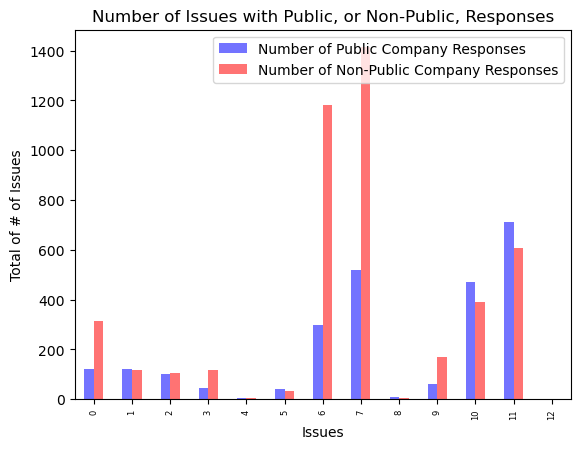

In [154]:
#EZE END
Issues_tot_merge_df.plot.bar(color=['b','r'], alpha=0.55, align='center')
plt.title('Number of Issues with Public, or Non-Public, Responses')
plt.xticks(rotation='vertical', fontsize=6)
plt.xlabel('Issues')
plt.ylabel('Total of # of Issues')
plt.savefig('Total Yes_No Issues')
plt.show()

In [8]:
#CARLOS START
# Create a variable to hold value counts of total responses per company will result same value as above for public
total_closed_yes = Yes_response_df['Company'].value_counts()
total_closed_yes

WELLS FARGO & COMPANY                    526
BANK OF AMERICA, NATIONAL ASSOCIATION    310
Ditech Financial LLC                     211
Freedom Mortgage Company                 167
LoanCare, LLC                            116
                                        ... 
BANKUNITED, NATIONAL ASSOCIATION           1
SUCCESS MORTGAGE PARTNERS, INC             1
Reverse Mortgage Solutions, Inc.           1
SYNCHRONY FINANCIAL                        1
Castle and Cookie Mortgage LLC             1
Name: Company, Length: 165, dtype: int64

In [10]:
#Adding new column to yes response dataframe
Yes_response_df["Total Closed Responses"] = Yes_response_df['Company'].map(total_closed_yes)

C:\Users\jodee\AppData\Local\Temp\ipykernel_16688\3624282959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Yes_response_df["Total Closed Responses"] = Yes_response_df['Company'].map(total_closed_yes)


In [11]:
#getting counts per company for total public responses
yes_grouped_total = Yes_response_df.groupby('Company')['Total Closed Responses'].max()
yes_grouped_total

Company
1ST PREFERENCE MORTGAGE CORP        1
360 MORTGAGE GROUP LLC              2
ALLY FINANCIAL INC.                 1
AMA Advisors, LLC.                 14
AMERICAN FINANCING CORPORATION      1
                                 ... 
WELLS FARGO & COMPANY             526
WESTSTAR MORTGAGE CORPORATION       1
WOLFE FINANCIAL, INC.               1
WSFS FINANCIAL CORPORATION          1
ZIONS BANCORPORATION                8
Name: Total Closed Responses, Length: 165, dtype: int64

In [12]:
# setting new dataframe to descending order
yes_grouped_total_df = pd.DataFrame(yes_grouped_total)
yes_grouped_total_df.sort_values(by=['Total Closed Responses'], ascending=False)

,Total Closed Responses
Company,
WELLS FARGO & COMPANY,526
"BANK OF AMERICA, NATIONAL ASSOCIATION",310
Ditech Financial LLC,211
Freedom Mortgage Company,167
"LoanCare, LLC",116
...,...
"Paramount GR Holdings, LLC",1
"Panorama Mortgage Group, LLC",1
FIRST MORTGAGE COMPANY,1


In [13]:
#Found Total Public responses for top 3 Companies
yes_final_grouped_df = yes_grouped_total_df.loc[yes_grouped_total_df['Total Closed Responses']>200]
yes_final_grouped_df = pd.DataFrame(yes_final_grouped_df)
yes_final_grouped_df

,Total Closed Responses
Company,
"BANK OF AMERICA, NATIONAL ASSOCIATION",310
Ditech Financial LLC,211
WELLS FARGO & COMPANY,526


In [15]:
# Create a variable to hold value counts of total responses per company will result same value as above for non public
total_closed_no = No_response_df['Company'].value_counts()
total_closed_no

Ocwen Financial Corporation              703
NATIONSTAR MORTGAGE LLC                  540
BANK OF AMERICA, NATIONAL ASSOCIATION    485
JPMORGAN CHASE & CO.                     381
WELLS FARGO & COMPANY                    307
                                        ... 
CHARLES SCHWAB CORPORATION, THE            1
MORTGAGE SOLUTIONS OF COLORADO             1
Santander Consumer USA Holdings Inc.       1
MORTGAGE LENDERS OF AMERICA                1
JLM R.E. INVESTMENTS                       1
Name: Company, Length: 232, dtype: int64

In [16]:
#Adding new column to yes response dataframe
No_response_df["Total Closed Responses"] = No_response_df['Company'].map(total_closed_no)

C:\Users\jodee\AppData\Local\Temp\ipykernel_16688\551786846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  No_response_df["Total Closed Responses"] = No_response_df['Company'].map(total_closed_no)


In [17]:
#getting counts per company for total public responses
no_grouped_total = No_response_df.groupby('Company')['Total Closed Responses'].max()
no_grouped_total

Company
1ST ALLIANCE LENDING, LLC         1
21ST MORTGAGE CORP.              12
360 MORTGAGE GROUP LLC            1
ACRE MORTGAGE                     1
ALEXANDER-ROSE ASSOC, INC.        1
                                 ..
WESTSTAR MORTGAGE CORPORATION     6
WILLOW BEND MORTGAGE              2
Williston Financial Group         1
Zeus Mortgage, Ltd.               1
iFreedom Direct Corporation       1
Name: Total Closed Responses, Length: 232, dtype: int64

In [18]:
# setting new dataframe to descending order
no_grouped_total_df = pd.DataFrame(no_grouped_total)
no_grouped_total_df.sort_values(by=['Total Closed Responses'], ascending=False)

,Total Closed Responses
Company,
Ocwen Financial Corporation,703
NATIONSTAR MORTGAGE LLC,540
"BANK OF AMERICA, NATIONAL ASSOCIATION",485
JPMORGAN CHASE & CO.,381
WELLS FARGO & COMPANY,307
...,...
"GMFS, LLC",1
"GEORGETOWN MORTGAGE, INC.",1
"GEORGE MASON MORTGAGE, LLC",1


In [19]:
#Found Total Non Public responses for top 3 Companies
no_final_grouped_df = no_grouped_total_df.loc[no_grouped_total_df['Total Closed Responses']>400]
no_final_grouped_df = pd.DataFrame(no_final_grouped_df)
no_final_grouped_df

,Total Closed Responses
Company,
"BANK OF AMERICA, NATIONAL ASSOCIATION",485
NATIONSTAR MORTGAGE LLC,540
Ocwen Financial Corporation,703


In [23]:
#BIG help from Jodee for the Merge of the two df so we can make a graph comparing the public from non
company_merge_df = pd.merge(yes_final_grouped_df, no_final_grouped_df, how='outer', on = 'Company')
display(company_merge_df)

,Total Closed Responses_x,Total Closed Responses_y
Company,,
"BANK OF AMERICA, NATIONAL ASSOCIATION",310.0,485.0
Ditech Financial LLC,211.0,NaN
WELLS FARGO & COMPANY,526.0,NaN
NATIONSTAR MORTGAGE LLC,NaN,540.0
Ocwen Financial Corporation,NaN,703.0


In [24]:
#Renaming of Columns
Bar_df = company_merge_df.rename(columns={"Total Closed Responses_x": "Top 3 Total Public Responses", "Total Closed Responses_y": "Top 3 Total No Public Responses"})
display(Bar_df)

,Top 3 Total Public Responses,Top 3 Total No Public Responses
Company,,
"BANK OF AMERICA, NATIONAL ASSOCIATION",310.0,485.0
Ditech Financial LLC,211.0,NaN
WELLS FARGO & COMPANY,526.0,NaN
NATIONSTAR MORTGAGE LLC,NaN,540.0
Ocwen Financial Corporation,NaN,703.0


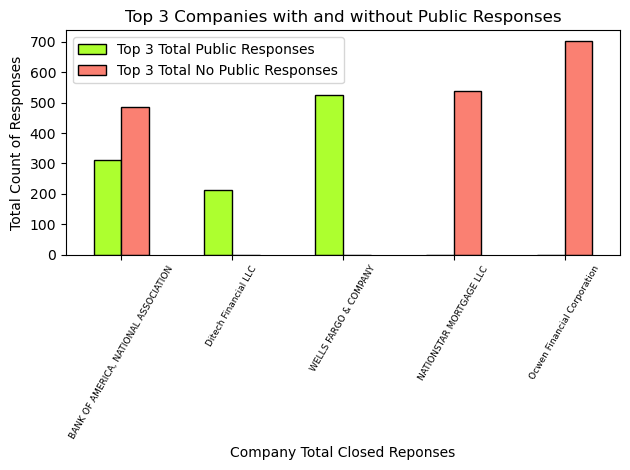

In [49]:
#Plotting Top 3 Public and NonPublic response Companies
Bar_df.plot(kind="bar",  color=["greenyellow", "salmon"], edgecolor='black')
plt.xticks(rotation=60, fontsize=6.5,horizontalalignment="center")
plt.title("Top 3 Companies with and without Public Responses")
plt.xlabel("Company Total Closed Reponses")
plt.ylabel("Total Count of Responses")
plt.tight_layout()
plt.savefig('total_Company_Reponse_Data.png')

In [32]:
#Creating dataset to create bar graph for public responses that were closed with explanation
Yes_grouped_response_df = Yes_response_df.groupby('Company')['Company response to consumer'].value_counts()
Yes_grouped_response_df

Company                        Company response to consumer
1ST PREFERENCE MORTGAGE CORP   Closed with explanation          1
360 MORTGAGE GROUP LLC         Closed with explanation          2
ALLY FINANCIAL INC.            Closed with explanation          1
AMA Advisors, LLC.             Closed with explanation         12
                               Closed with monetary relief      2
                                                               ..
WELLS FARGO & COMPANY          Closed with monetary relief     30
WESTSTAR MORTGAGE CORPORATION  Closed with explanation          1
WOLFE FINANCIAL, INC.          Closed with explanation          1
WSFS FINANCIAL CORPORATION     Closed with explanation          1
ZIONS BANCORPORATION           Closed with explanation          8
Name: Company response to consumer, Length: 220, dtype: int64

In [33]:
Yes_grouped_df = pd.DataFrame(Yes_grouped_response_df)
Yes_grouped_df = Yes_grouped_df.rename(columns= {"Company response to consumer": "# of Public Responses Per Company"})

In [34]:
# Set data frame in descending order 
Yes_grouped_df.sort_values(by=['# of Public Responses Per Company'], ascending=False)

,,# of Public Responses Per Company
Company,Company response to consumer,
WELLS FARGO & COMPANY,Closed with explanation,456
"BANK OF AMERICA, NATIONAL ASSOCIATION",Closed with explanation,225
Ditech Financial LLC,Closed with explanation,181
Freedom Mortgage Company,Closed with explanation,167
"LoanCare, LLC",Closed with explanation,116
...,...,...
"Lenderfi, Inc.",Closed with non-monetary relief,1
Lending Solutions Mortgage/ LSI Mortgage,Closed with explanation,1
Lenox Financial Mortgage Corporation,Closed with non-monetary relief,1


In [35]:
#This is to show the amount of responses closed with EXPLANATION per company top 3 PUBLIC
public_complaints_df = Yes_response_df.groupby('Company response to consumer')['Company']
pub_explanation_df = public_complaints_df.get_group('Closed with explanation').value_counts()
pub_explanation_df = pd.DataFrame(pub_explanation_df)
pub_explanation_df = pub_explanation_df.rename(columns= {"Company": "Total of Explanation Responses"})
pub_exp_top_df = pub_explanation_df.loc[pub_explanation_df['Total of Explanation Responses']>180]
pub_exp_top_df = pd.DataFrame(pub_exp_top_df)
pub_exp_top_df

,Total of Explanation Responses
WELLS FARGO & COMPANY,456
"BANK OF AMERICA, NATIONAL ASSOCIATION",225
Ditech Financial LLC,181


In [36]:
#This is to show the amount of responses closed with NON-MONETARY RELIEF top 3 Public
non_monetary_p_df = public_complaints_df.get_group('Closed with non-monetary relief').value_counts()
non_monetary_p_df = pd.DataFrame(non_monetary_p_df)
non_monetary_p_df = non_monetary_p_df.rename(columns= {"Company": "Total of Non-Monetary Responses"})
public_non_monetary_top_df = non_monetary_p_df.loc[non_monetary_p_df['Total of Non-Monetary Responses']>20]
public_non_monetary_top_df = pd.DataFrame(public_non_monetary_top_df)
public_non_monetary_top_df

,Total of Non-Monetary Responses
"BANK OF AMERICA, NATIONAL ASSOCIATION",46
WELLS FARGO & COMPANY,40
Ditech Financial LLC,25


In [37]:
#This is to show the amount of responses closed with MONETARY RELIEF top 3 Public
monetary_df = public_complaints_df.get_group('Closed with monetary relief').value_counts()
monetary_df = pd.DataFrame(monetary_df)
monetary_df = monetary_df.rename(columns= {"Company": "Total of Monetary Responses"})
monetary_top_df = monetary_df.loc[monetary_df['Total of Monetary Responses']>5]
monetary_top_df = pd.DataFrame(monetary_top_df)
monetary_top_df

,Total of Monetary Responses
"BANK OF AMERICA, NATIONAL ASSOCIATION",36
WELLS FARGO & COMPANY,30
U.S. BANCORP,6


In [38]:
#This is to show the amount of responses Closed top 3
closed_df = public_complaints_df.get_group('Closed').value_counts()
closed_df = pd.DataFrame(closed_df)
closed_df = closed_df.rename(columns= {"Company": "Total of Closed Responses"})
closed_df

,Total of Closed Responses
"BANK OF AMERICA, NATIONAL ASSOCIATION",3
"SERVICE 1ST MORTGAGE, INC.",1
Forthright Funding Corporation,1
RoundPoint Mortgage Servicing Corporation,1
ROCKY MOUNTAIN MORTGAGE COMPANY,1


In [39]:
#Creating Dataframes for No public responses
No_grouped_response_df = No_response_df.groupby('Company')['Company response to consumer'].value_counts()
No_grouped_response_df

Company                        Company response to consumer   
1ST ALLIANCE LENDING, LLC      Closed with explanation             1
21ST MORTGAGE CORP.            Closed with explanation            11
                               Closed with non-monetary relief     1
360 MORTGAGE GROUP LLC         Closed with explanation             1
ACRE MORTGAGE                  Closed with monetary relief         1
                                                                  ..
WESTSTAR MORTGAGE CORPORATION  Closed with explanation             6
WILLOW BEND MORTGAGE           Closed with explanation             2
Williston Financial Group      Closed with explanation             1
Zeus Mortgage, Ltd.            Closed with explanation             1
iFreedom Direct Corporation    Closed with explanation             1
Name: Company response to consumer, Length: 353, dtype: int64

In [40]:
No_grouped_df = pd.DataFrame(No_grouped_response_df)
No_grouped_df = No_grouped_df.rename(columns= {"Company response to consumer": "# of Non Public Responses Per Company"})

In [41]:
# Set data frame in descending order 
No_grouped_df.sort_values(by=['# of Non Public Responses Per Company'], ascending=False)

,,# of Non Public Responses Per Company
Company,Company response to consumer,
Ocwen Financial Corporation,Closed with explanation,644
NATIONSTAR MORTGAGE LLC,Closed with explanation,524
"BANK OF AMERICA, NATIONAL ASSOCIATION",Closed with explanation,331
JPMORGAN CHASE & CO.,Closed with explanation,310
WELLS FARGO & COMPANY,Closed with explanation,236
...,...,...
JLM R.E. INVESTMENTS,Untimely response,1
"LD Holdings Group, LLC",Closed with non-monetary relief,1
LENDER LIVE,Closed with explanation,1


In [42]:
#This is to show the amount of responses closed with EXPLANATION per company top 3 Non PUBLIC
non_public_complaints_df = No_response_df.groupby('Company response to consumer')['Company']
non_pub_explanation_df = non_public_complaints_df.get_group('Closed with explanation').value_counts()
non_pub_explanation_df = pd.DataFrame(non_pub_explanation_df)
non_pub_explanation_df = non_pub_explanation_df.rename(columns= {"Company": "Total of Non Public Explanation Responses"})
non_pub_explanation_df
non_pub_exp_top_df = non_pub_explanation_df.loc[non_pub_explanation_df['Total of Non Public Explanation Responses']>320]
non_pub_exp_top_df = pd.DataFrame(non_pub_exp_top_df)
non_pub_exp_top_df

,Total of Non Public Explanation Responses
Ocwen Financial Corporation,644
NATIONSTAR MORTGAGE LLC,524
"BANK OF AMERICA, NATIONAL ASSOCIATION",331


In [43]:
#This is to show the amount of responses closed with NON-MONETARY RELIEF top 3 Non Public
np_non_monetary_df = non_public_complaints_df.get_group('Closed with non-monetary relief').value_counts()
np_non_monetary_df = pd.DataFrame(np_non_monetary_df)
np_non_monetary_df = np_non_monetary_df.rename(columns= {"Company": "Total of Non Public Non-Monetary Responses"})
np_non_monetary_df
nonpublic_non_monetary_top_df = np_non_monetary_df.loc[np_non_monetary_df['Total of Non Public Non-Monetary Responses']>10]
nonpublic_non_monetary_top_df = pd.DataFrame(nonpublic_non_monetary_top_df)
nonpublic_non_monetary_top_df

,Total of Non Public Non-Monetary Responses
"BANK OF AMERICA, NATIONAL ASSOCIATION",67
WELLS FARGO & COMPANY,27
BBVA FINANCIAL CORPORATION,12


In [44]:
#This is to show the amount of responses closed with MONETARY RELIEF top 3 Non Public
np_monetary_df = non_public_complaints_df.get_group('Closed with monetary relief').value_counts()
np_monetary_df = pd.DataFrame(np_monetary_df)
np_monetary_df = np_monetary_df.rename(columns= {"Company": "Total of Non Public Monetary Responses"})
np_monetary_top_df = np_monetary_df.loc[np_monetary_df['Total of Non Public Monetary Responses']>11]
np_monetary_top_df = pd.DataFrame(np_monetary_top_df)
np_monetary_top_df

,Total of Non Public Monetary Responses
JPMORGAN CHASE & CO.,42
WELLS FARGO & COMPANY,12
BBVA FINANCIAL CORPORATION,12


In [45]:
#This is to show the amount of responses Closed top 3
np_closed_df = non_public_complaints_df.get_group('Closed').value_counts()
np_closed_df = pd.DataFrame(np_closed_df)
np_closed_df = np_closed_df.rename(columns= {"Company": "Total of Non Public Closed Responses"})
np_closed_top_df = np_closed_df.loc[np_closed_df['Total of Non Public Closed Responses']>6]
np_closed_top_df = pd.DataFrame(np_closed_top_df)
np_closed_top_df

,Total of Non Public Closed Responses
Ocwen Financial Corporation,24
PNC Bank N.A.,7
Specialized Loan Servicing Holdings LLC,7


In [113]:
issues_top3_merge_df = pd.concat([pub_exp_top_df, public_non_monetary_top_df, 
                                monetary_top_df, closed_df], axis=1)
display(issues_top3_merge_df)

,Total of Explanation Responses,Total of Non-Monetary Responses,Total of Monetary Responses,Total of Closed Responses
WELLS FARGO & COMPANY,456.0,40.0,30.0,NaN
"BANK OF AMERICA, NATIONAL ASSOCIATION",225.0,46.0,36.0,3.0
Ditech Financial LLC,181.0,25.0,NaN,NaN
U.S. BANCORP,NaN,NaN,6.0,NaN
"SERVICE 1ST MORTGAGE, INC.",NaN,NaN,NaN,1.0
Forthright Funding Corporation,NaN,NaN,NaN,1.0
RoundPoint Mortgage Servicing Corporation,NaN,NaN,NaN,1.0
ROCKY MOUNTAIN MORTGAGE COMPANY,NaN,NaN,NaN,1.0


In [114]:
non_issues_top3_merge_df = pd.concat([non_pub_exp_top_df, nonpublic_non_monetary_top_df,
                                np_monetary_top_df, np_closed_top_df], axis=1) 
display(non_issues_top3_merge_df)

,Total of Non Public Explanation Responses,Total of Non Public Non-Monetary Responses,Total of Non Public Monetary Responses,Total of Non Public Closed Responses
Ocwen Financial Corporation,644.0,NaN,NaN,24.0
NATIONSTAR MORTGAGE LLC,524.0,NaN,NaN,NaN
"BANK OF AMERICA, NATIONAL ASSOCIATION",331.0,67.0,NaN,NaN
WELLS FARGO & COMPANY,NaN,27.0,12.0,NaN
BBVA FINANCIAL CORPORATION,NaN,12.0,12.0,NaN
JPMORGAN CHASE & CO.,NaN,NaN,42.0,NaN
PNC Bank N.A.,NaN,NaN,NaN,7.0
Specialized Loan Servicing Holdings LLC,NaN,NaN,NaN,7.0


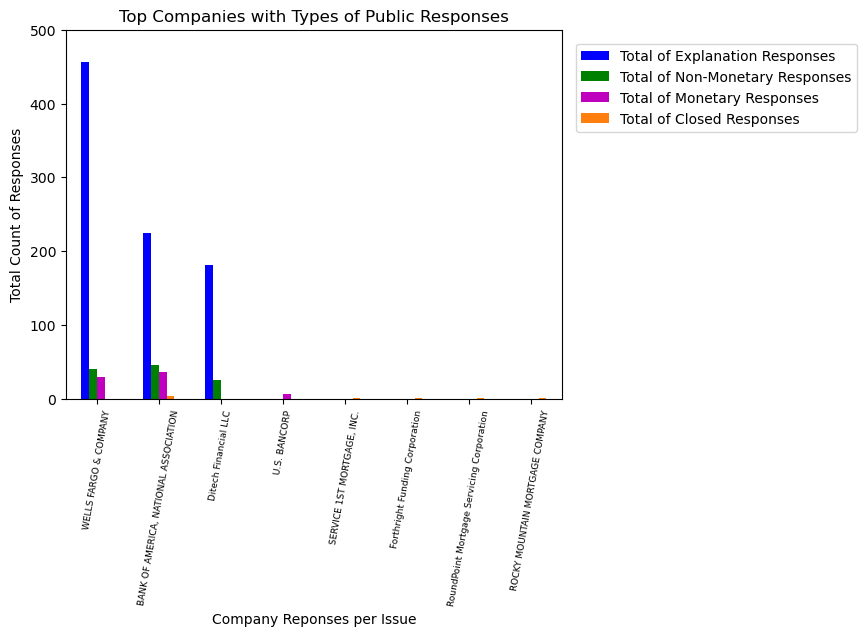

In [116]:
#Plotting Top 3 Public and NonPublic response Companies
issues_top3_merge_df.plot(kind="bar",  color=["b","g", "m", "tab:orange"])
plt.xticks(rotation=80, fontsize=6.5,horizontalalignment="center")
plt.title("Top Companies with Types of Public Responses")
plt.xlabel("Company Reponses per Issue")
plt.ylabel("Total Count of Responses")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=1)
plt.ylim(-1, 500)

plt.savefig('Public_Issue_per_Company_Reponse_Data.png')

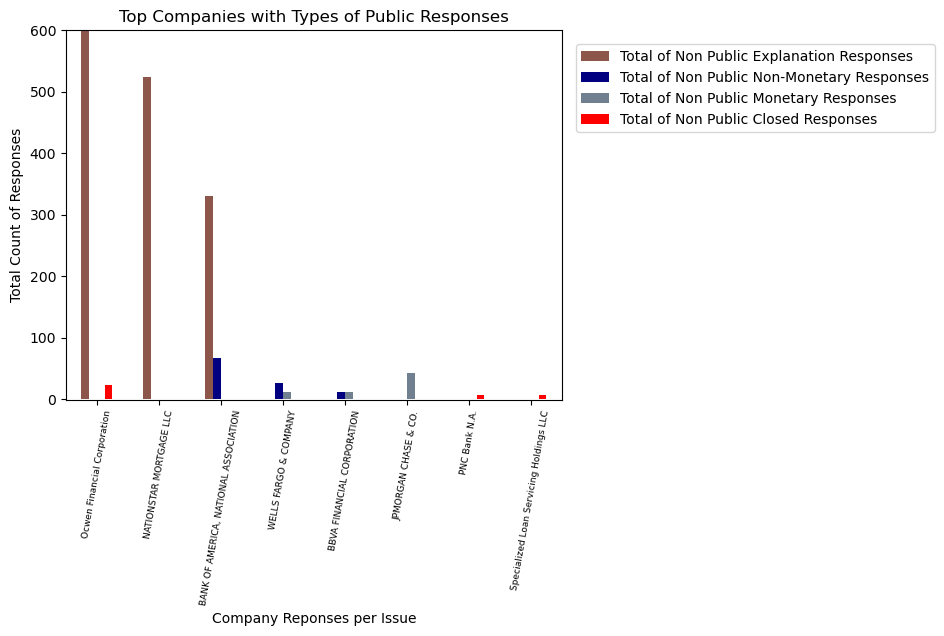

In [119]:
#CARLOS END
#Plotting Top 3 Public and NonPublic response Companies
non_issues_top3_merge_df.plot(kind="bar",  color=["tab:brown", "navy", "slategrey", "r"])
plt.xticks(rotation=80, fontsize=6.5,horizontalalignment="center")
plt.title("Top Companies with Types of Public Responses")
plt.xlabel("Company Reponses per Issue")
plt.ylabel("Total Count of Responses")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=1)
plt.ylim(-1, 600)

plt.savefig('NonPublic_Issue_per_Company_Reponse_Data.png')